In [1]:
import seaborn as sns
import pandas as pd

In [16]:
figure_df = pd.read_csv("DemoExample_GeneExpression.csv", sep='\t', index_col=0, header=0)

,C1-1,C1-2,C1-3,C1-4,C1-5,C1-6,C1-7,C1-8,C1-9,C1-10,...,C2-3,C2-4,C2-5,C2-6,C2-7,C2-8,C2-9,C2-10,C2-11,C2-12
Acap2,1528,1341,1430,1192,3612,1899,2324,2354,1830,1430,...,562,505,1789,592,740,554,1185,459,629,1061
Arc,6877,3871,5334,4252,6916,4640,5300,10312,16238,8795,...,16,0,127,109,0,12,8,7,3,549
Arpp21,5558,2232,3911,2947,6008,4147,2375,4298,8915,4418,...,790,314,1288,860,385,816,976,715,614,794
Atf3,2472,1770,1660,2000,2401,2778,2132,3060,3106,1880,...,1,10,10,40,10,10,10,11,10,10
Atf4,975,480,2168,1231,1785,1971,1454,1837,1747,2053,...,118,511,343,2533,1,2676,637,16,640,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ubc,3540,755,1624,387,2499,1486,1764,5041,5587,4179,...,2549,1232,946,3565,1242,2695,2602,75,1266,2058
Uchl1,1785,897,1415,844,1482,1855,1718,5029,8407,3465,...,3369,3888,988,8316,2371,2166,3993,329,1149,1417
Vcp,3745,1403,1615,1460,1842,2899,2409,3421,3313,3198,...,997,3377,919,4612,1526,3764,3391,580,1886,2925
Ypel5,3326,1573,2215,1103,2227,1650,1982,3136,7259,2494,...,1982,1665,1359,2642,1333,2988,2476,566,1045,1534


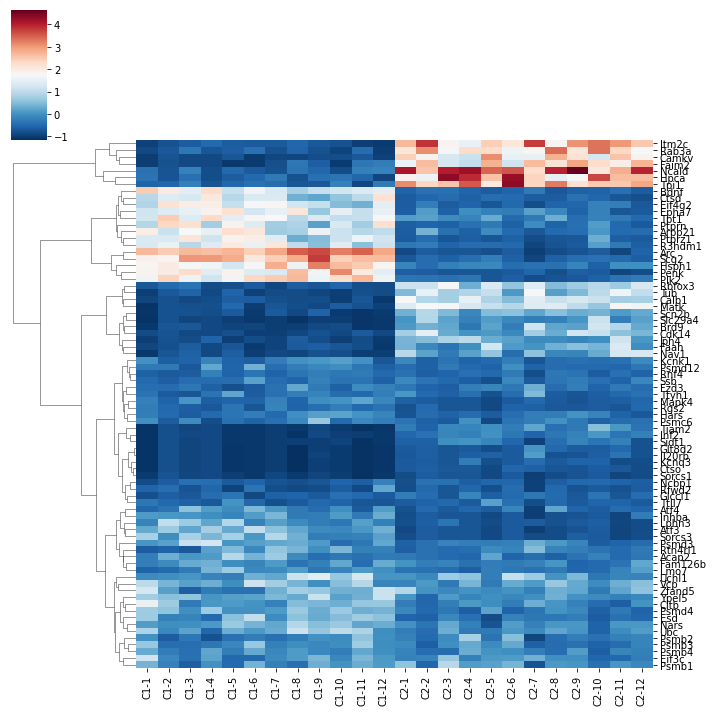

In [3]:
figure=sns.clustermap(figure_df, metric='euclidean', method="complete", row_cluster=True, col_cluster=False, cmap ='RdBu_r', z_score =1, yticklabels=1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [5]:
##normalize your data
xx = StandardScaler().fit_transform(figure_df)
xx = pd.DataFrame(xx, columns=figure_df.columns, index=figure_df.index)

In [6]:
##do PCA analysis for all components, you can alos define specific number of components as pcamodel =PCA(n_components=5)
##PCA Major steps
##Calculating the covariance matrix
##Calculating the eigenvalues and eigenvector
##Forming Principal Components
##Projection into the new feature space

pcamodel = PCA()
pca = pcamodel.fit_transform(xx)
pca.shape

(78, 24)

In [7]:
pca

array([[-1.1011558 , -0.83056102, -1.01099037, ...,  0.06916898,
         0.05130829, -0.10631473],
       [-9.11725578,  5.38131951,  0.76022185, ..., -0.08851495,
        -0.11054327,  0.11834902],
       [-4.38319193,  2.49691457, -0.93292643, ...,  0.030512  ,
         0.39748869, -0.0927748 ],
       ...,
       [-0.73803913,  1.48451894,  0.39086011, ..., -0.12549536,
         0.18102236,  0.20290913],
       [-1.34882474,  1.00480839,  0.43876392, ..., -0.1458675 ,
        -0.1185307 , -0.04312163],
       [-0.31535169,  1.01018595,  1.24670586, ..., -0.02669197,
        -0.17877525, -0.03410092]])

In [8]:
##check the variances for each component
pcamodel.explained_variance_

array([14.32634039,  7.08037201,  0.61683258,  0.39657953,  0.26057605,
        0.17604525,  0.16264174,  0.15417818,  0.13745407,  0.12737264,
        0.11595825,  0.09530887,  0.08624974,  0.08355483,  0.07947234,
        0.07262807,  0.06214969,  0.06036437,  0.04939621,  0.04776169,
        0.03573823,  0.03414789,  0.02756268,  0.02300301])

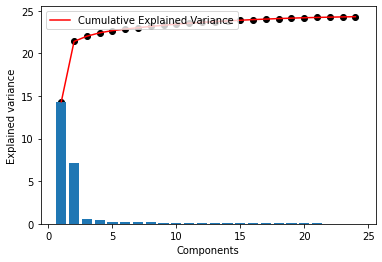

In [9]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         color='red',
         label="Cumulative Explained Variance")
plt.scatter(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         color='black')
plt.legend(loc='upper left')
plt.show()

In [10]:
##check the variance ratio for each component
pcamodel.explained_variance_ratio_

array([0.58927789, 0.29123325, 0.02537185, 0.0163123 , 0.01071814,
       0.00724118, 0.00668986, 0.00634173, 0.00565383, 0.00523915,
       0.00476965, 0.00392029, 0.00354767, 0.00343682, 0.00326889,
       0.00298737, 0.00255637, 0.00248294, 0.00203179, 0.00196456,
       0.00147   , 0.00140459, 0.00113372, 0.00094617])

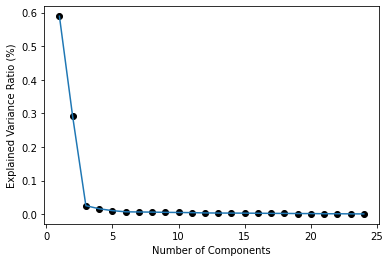

In [11]:
plt.plot(range(1,len(pcamodel.explained_variance_ )+1), pcamodel.explained_variance_ratio_)
plt.scatter(range(1,len(pcamodel.explained_variance_ )+1), pcamodel.explained_variance_ratio_, color = 'black')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.show()

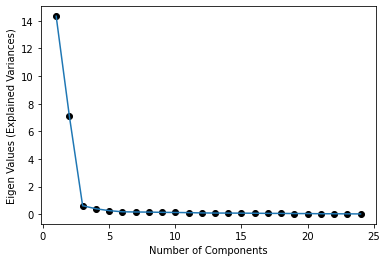

In [12]:
##check the eigen values (explained_variance_) for each of the components
plt.plot(range(1,len(pcamodel.explained_variance_ )+1), pcamodel.explained_variance_)
plt.scatter(range(1,len(pcamodel.explained_variance_ )+1), pcamodel.explained_variance_, color = 'black')
plt.xlabel('Number of Components')
plt.ylabel('Eigen Values (Explained Variances)')
plt.show()

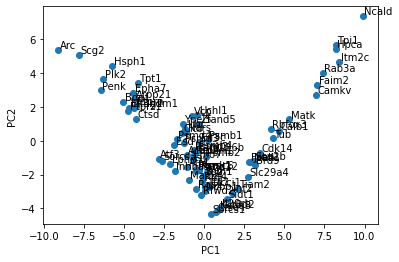

In [13]:
## plot your data on PC1 and PC2 with labels
plt.scatter(pca[:, 0], pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, label in enumerate(figure_df.index):
    plt.annotate(label, (pca[i, 0]+0.1, pca[i, 1]+0.1))

plt.show()

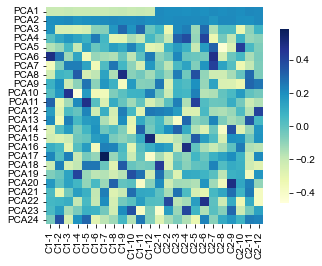

In [14]:
## check the influence on each of the components by features
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(xx.columns),
                 cbar_kws={"shrink": 0.8})
ax.set_aspect("equal")
sns.set(rc = {'figure.figsize':(12,12)})
plt.show()

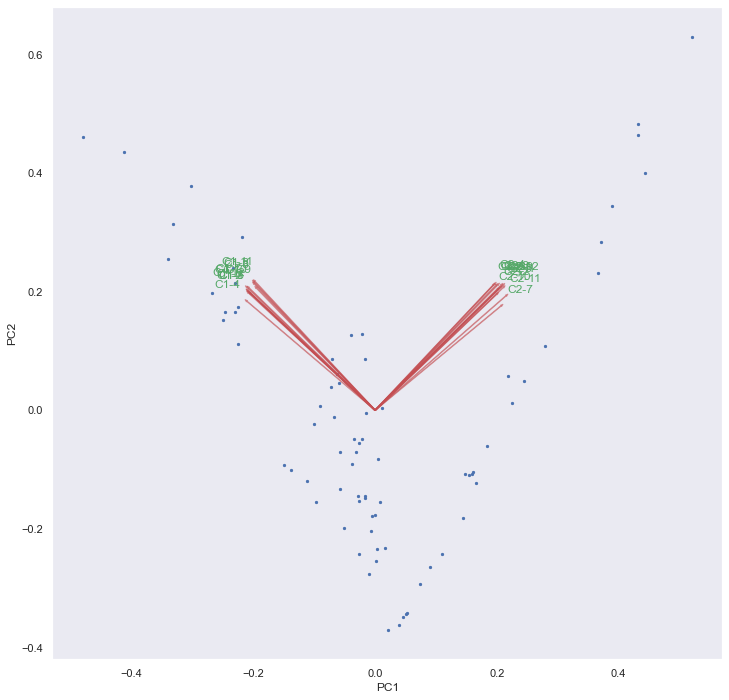

In [15]:
##check each characteristic influence on principal component
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(xx.columns))
plt.show()